In [1]:
from UTILITY_quickstart import *

In [2]:
tao = initializeTao(
    inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    # defaultsFile = "setLattice_defaults_2024-08-21_demo.yml",
    # csrTF = True,
    numMacroParticles = 1e3,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_defaults.yml
Number of macro particles = 1000.0


### Remember that the beam is dumped relative to the reference orbit

In [3]:
# trackBeam(tao)

# P1 = getBeamAtElement(tao, "L0AFEND")
# P2 = getBeamAtElement(tao, "L0BFEND")

# print(f"""{P1["mean_x"], P1["mean_y"], P1["mean_z"], P1["mean_energy"]}""")
# print(f"""{P2["mean_x"], P2["mean_y"], P2["mean_z"], P2["mean_energy"]}""")

### Pulling the floor coords

In [4]:
tao.cmd("show ele L0AFEND -all")

['Element # 37',
 'Element Name: L0AFEND',
 'Key: Marker',
 'S_start, S:      4.127448,      4.127448',
 'Ref_time_start, Ref_time:  1.378376E-08,  1.378376E-08',
 '',
 'Attribute values:',
 '    1  L                           =  0.0000000E+00 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    3  X_GAIN_ERR                  =  0.0000000E+00 m         4  Y_GAIN_ERR                  =  0.0000000E+00 m',
 '    5  CRUNCH                      =  0.0000000E+00 rad      21  CRUNCH_CALIB                =  0.0000000E+00 rad',
 '    6  NOISE                       =  0.0000000E+00          26  N_SAMPLE                    =  0.0000000E+00',
 '    7  OSC_AMPLITUDE               =  0.0000000E+00 m',
 '    8  X_GAIN_CALIB                =  0.0000000E+00 m        20  Y_GAIN_CALIB                =  0.0000000E+00 m',
 '   22  X_OFFSET_CALIB              =  0.0000000E+00 m        23  Y_OFFSET_CALIB              =  0.0000000E+00 

In [5]:
tao.ele_floor("L0AFEND")

{'Reference': array([ 7.82769515e+00,  0.00000000e+00,  1.00565495e+03, -6.10865238e-01,
         0.00000000e+00,  0.00000000e+00]),
 'Reference-W': array([ 0.81915204,  0.        ,  0.57357644,  0.        ,  1.        ,
        -0.        , -0.57357644,  0.        ,  0.81915204]),
 'Actual': array([ 7.82769515e+00,  0.00000000e+00,  1.00565495e+03, -6.10865238e-01,
         0.00000000e+00,  0.00000000e+00]),
 'Actual-W': array([ 0.81915204,  0.        ,  0.57357644,  0.        ,  1.        ,
         0.        , -0.57357644,  0.        ,  0.81915204])}

The -W arrays are the 3x3 rotation matrix from theta, phi, psi 

### Get elements of interest

In [6]:
tao.cmd("show lat Sextupole::*")

['# Values shown are for the Exit End of each Element:',
 '# Index  name   key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                         a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '   1330  S1EL#1 Sextupole           943.288   0.125  662.94   9.334  -0.29  -0.000  182.89   8.838   0.00  -0.000  Alive',
 '   1332  S1EL#2 Sextupole           943.413   0.125  738.23   9.334  -0.31  -0.000  164.75   8.838   0.00  -0.000  Alive',
 '   1341  S2EL#1 Sextupole           946.101   0.381  606.99   9.334  -0.33  -0.000   35.70   8.846   0.00  -0.000  Alive',
 '   1343  S2EL#2 Sextupole           946.482   0.381  411.16   9.334  -0.28  -0.000   34.13   8.848  -0.00  -0.000  Alive',
 '   1351  S3EL_1 Sextupole           948.685   0.250   24.41   9.831  -0.00   0.000   25.91   8.860  -0.00   0.000  Alive',
 '   1361  S3EL_2 Sextupole           952.016   0.250  155.39   9.83

In [7]:
tao.cmd("show ele S1ER")

['Element # 1767',
 'Element Name: S1ER',
 'Element Type:  "1.625S9.06"',
 'Key: Sextupole',
 'S_start, S:    964.735613,    964.985613',
 'Ref_time_start, Ref_time:  3.218029E-06,  3.218863E-06',
 '',
 'Attribute values [Only non-zero values shown]:',
 '    1  L                           =  2.5000000E-01 m',
 '    5  K2                          =  9.6517702E+00 1/m^3    46  B2_GRADIENT                 = -3.2189803E+02 T/m^2',
 '   10  FRINGE_TYPE                 =  None (1)               11  FRINGE_AT                   =  Both_Ends (3)',
 '   13  SPIN_FRINGE_ON              =  T (1)',
 '   17  STATIC_LINEAR_MAP           =  F (0)',
 '   47  PTC_CANONICAL_COORDS        =  T (1)',
 '   53  P0C                         =  9.9984356E+09 eV           BETA                        =  1.0000000E+00',
 '   54  E_TOT                       =  9.9984356E+09 eV           GAMMA                       =  1.9566450E+04',
 '   64  REF_TIME_START              =  3.2180286E-06 sec      50  DELTA_REF_TIME  

In [8]:
tao.cmd("show lat Monitor::*")

['# Values shown are for the Exit End of each Element:',
 '# Index  name     key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                           a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '     20  BPM10221 Monitor               0.699   0.000    5.49   0.353   0.00   0.000    4.25   0.405   0.00   0.000  Alive',
 '     25  PR10241  Monitor               0.942   0.000   10.47   0.358   0.00   0.000    8.71   0.411   0.00   0.000  Alive',
 '     46  BPM10371 Monitor               4.741   0.000  103.45   0.376   0.00   0.000   20.95   0.432   0.00   0.000  Alive',
 '     69  BPM10425 Monitor               8.052   0.000    1.50   0.834   0.00   0.000   18.36   0.906   0.00   0.000  Alive',
 '     83  PR10465  Monitor               9.107   0.000    5.00   0.862  -0.04  -0.000    0.44   1.000   0.00   0.000  Alive',
 '     89  PR10471  Monitor               9.782   0.00

In [9]:
setLattice(tao)
tao.ele_floor("MS2EL")["Reference"][0]

-0.194169621018922

In [10]:
setXOffset(tao, "S1EL", 0.01)
tao.ele_floor("MS2EL")["Reference"][0]

-0.194169621018922

In [11]:
setLattice(tao)
getMatrix(tao, "BEGBC20", "MS2EL", print = True);

-3.720369,-12.506979,-0.000000,-0.000000,0.000000,-0.375087
1.421256,4.509126,0.000000,0.000000,0.000000,0.125683
-0.000000,-0.000000,1.289089,11.239052,0.000000,-0.000000
-0.000000,-0.000000,-0.181644,-0.807938,0.000000,-0.000000
-0.065505,-0.119393,-0.000000,-0.000000,1.000000,-0.002328
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [12]:
setXOffset(tao, "S1EL", 0.01)
getMatrix(tao, "BEGBC20", "MS2EL", print = True);

-3.853518,-12.935573,-0.000000,-0.000000,0.000000,-0.387137
1.404535,4.455269,0.000000,0.000000,0.000000,0.124070
-0.000000,-0.000000,1.034190,9.219767,0.000000,-0.000000
-0.000000,-0.000000,-0.338281,-2.048820,0.000000,-0.000000
-0.065642,-0.119886,-0.000000,-0.000000,1.000000,-0.002344
0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [13]:
setLattice(tao)
tao.cmd("show ele MS2EL -all")

['Element # 1340',
 'Element Name: MS2EL',
 'Element Type:  "R0"',
 'Key: Monitor',
 'S_start, S:    945.719531,    945.719531',
 'Ref_time_start, Ref_time:  3.154598E-06,  3.154598E-06',
 '',
 'Attribute values:',
 '    1  L                           =  0.0000000E+00 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    3  X_GAIN_ERR                  =  0.0000000E+00 m         4  Y_GAIN_ERR                  =  0.0000000E+00 m',
 '    5  CRUNCH                      =  0.0000000E+00 rad      21  CRUNCH_CALIB                =  0.0000000E+00 rad',
 '    6  NOISE                       =  0.0000000E+00          26  N_SAMPLE                    =  0.0000000E+00',
 '    7  OSC_AMPLITUDE               =  0.0000000E+00 m',
 '    8  X_GAIN_CALIB                =  0.0000000E+00 m        20  Y_GAIN_CALIB                =  0.0000000E+00 m',
 '   10  FRINGE_TYPE                 =  None (1)               11  FRINGE_AT           

In [14]:
setXOffset(tao, "S1EL", 0.01)
tao.cmd("show ele MS2EL -all")

['Element # 1340',
 'Element Name: MS2EL',
 'Element Type:  "R0"',
 'Key: Monitor',
 'S_start, S:    945.719531,    945.719531',
 'Ref_time_start, Ref_time:  3.154598E-06,  3.154598E-06',
 '',
 'Attribute values:',
 '    1  L                           =  0.0000000E+00 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    3  X_GAIN_ERR                  =  0.0000000E+00 m         4  Y_GAIN_ERR                  =  0.0000000E+00 m',
 '    5  CRUNCH                      =  0.0000000E+00 rad      21  CRUNCH_CALIB                =  0.0000000E+00 rad',
 '    6  NOISE                       =  0.0000000E+00          26  N_SAMPLE                    =  0.0000000E+00',
 '    7  OSC_AMPLITUDE               =  0.0000000E+00 m',
 '    8  X_GAIN_CALIB                =  0.0000000E+00 m        20  Y_GAIN_CALIB                =  0.0000000E+00 m',
 '   10  FRINGE_TYPE                 =  None (1)               11  FRINGE_AT           

In [15]:
setLattice(tao)
tao.ele_orbit("MS2EL")["x"]

4.28585111748634e-15

In [16]:
setXOffset(tao, "S1EL", 0.001)
tao.ele_orbit("MS2EL")["x"]

-2.06441047968324e-06

So the BPM floor coordinate does not change when the sextupole is moved (it would have been odd convention if it did, but not implausible. After all, the "reference orbit" is changing for certain interpretations)
Instead, we want to refer to the single particle orbit

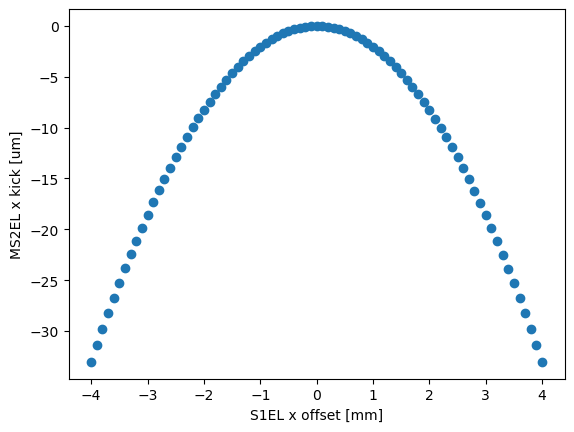

In [17]:
sextStep = 0.0001
offsets = np.arange(-0.004, 0.004+sextStep, sextStep)
xArr = []

for offset in offsets:
    setXOffset(tao, "S1EL", offset)
    xArr.append(tao.ele_orbit("MS2EL")["x"])

xArr = np.array(xArr)

plt.plot(1e3 * offsets, 1e6 * xArr, 'o')
plt.xlabel('S1EL x offset [mm]')
plt.ylabel('MS2EL x kick [um]')
plt.show()


### Picking BPMs

In [18]:
tao.cmd('show lat Monitor::* -att Type')

['# Values shown are for the Exit End of each Element:',
 '# Index  name     key                      s       l  Type',
 '     20  BPM10221 Monitor              0.699   0.000  SA-388-014-10',
 '     25  PR10241  Monitor              0.942   0.000  YAG',
 '     46  BPM10371 Monitor              4.741   0.000  Stripline-1',
 '     69  BPM10425 Monitor              8.052   0.000  Stripline-1',
 '     83  PR10465  Monitor              9.107   0.000  @0,OTR',
 '     89  PR10471  Monitor              9.782   0.000  @0,OTR',
 '    102  BPM10511 Monitor             11.145   0.000  Stripline-1',
 '    109  BPM10525 Monitor             11.535   0.000  Stripline-1',
 '    124  PR10571  Monitor             14.237   0.000  OTR',
 '    126  BPM10581 Monitor             14.402   0.000  Stripline-1',
 '    130  BZ10596  Monitor             14.943   0.000  ceramic gap',
 '    133  BPM10631 Monitor             15.917   0.000  Stripline-1',
 '    140  BPM10651 Monitor             16.473   0.000  Striplin

In [19]:
#Handpicked. Subject to change
selectedBPMs =["M3E", "MS2EL", "M4E", "M5E", "M6E", "M7E", "M8E", "MS2ER", "M9E", "M11E", "M1FF"]

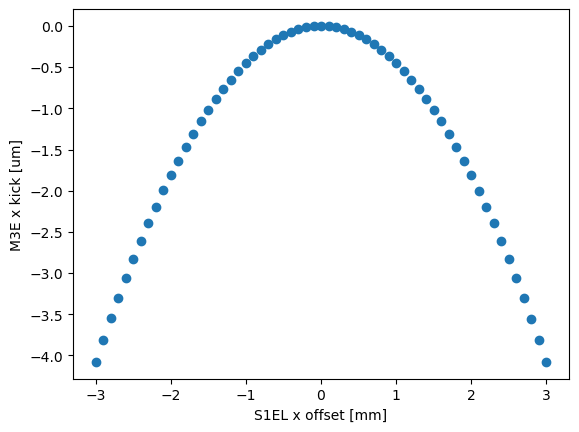

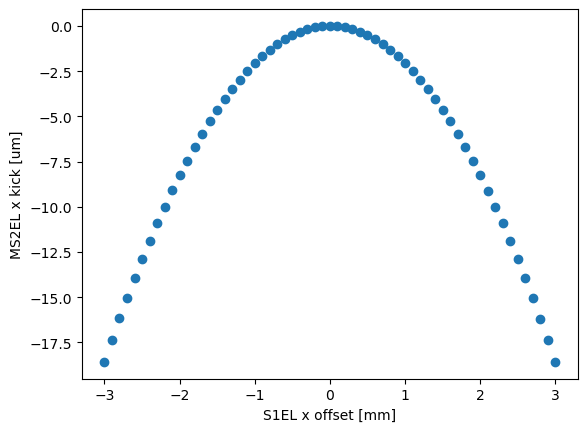

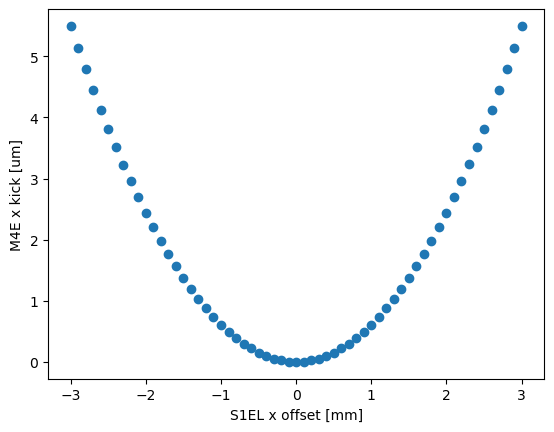

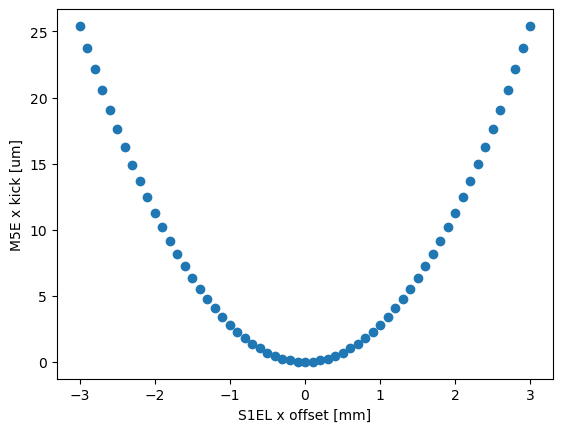

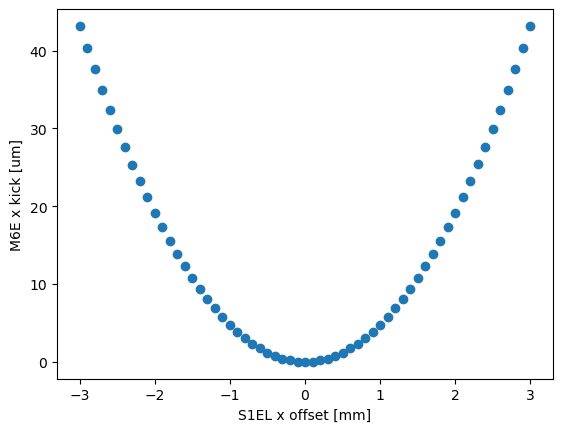

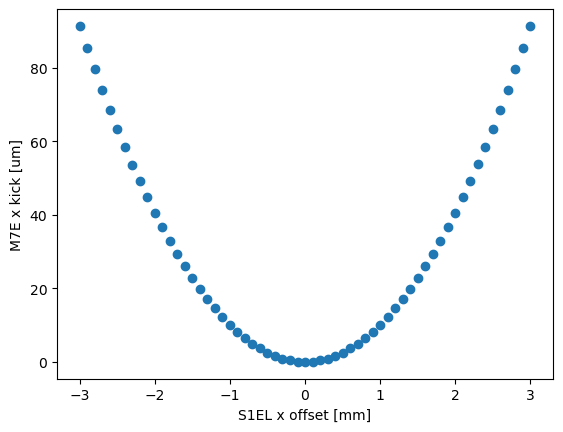

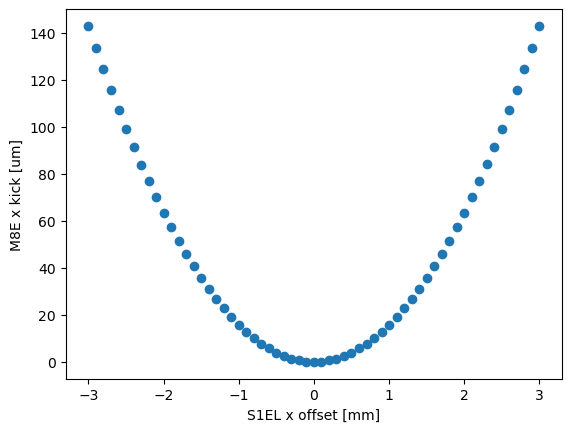

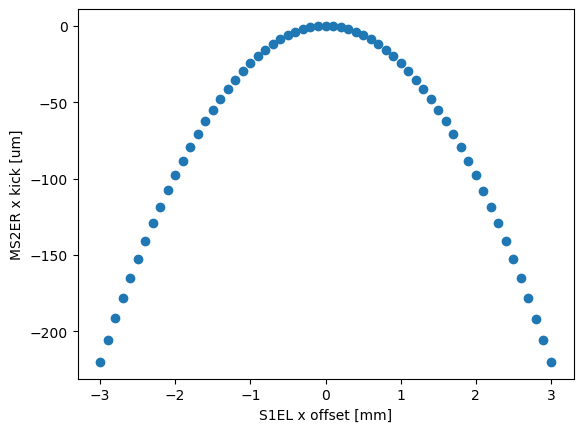

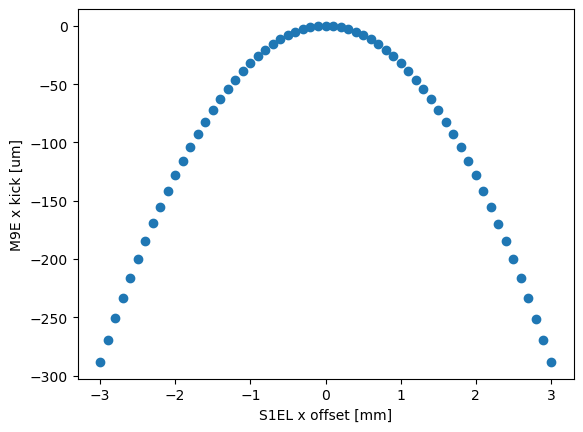

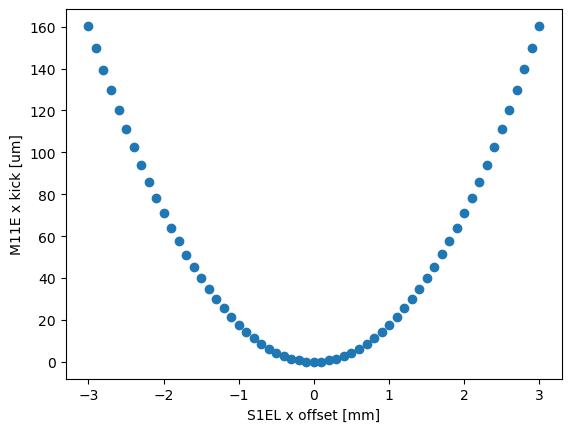

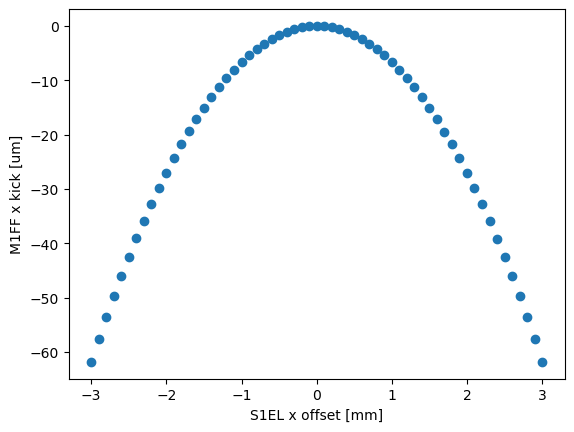

In [20]:
sextStep = 0.0001
offsets = np.arange(-0.003, 0.003+sextStep, sextStep)



for bpmName in selectedBPMs: 
    xArr = []
    
    for offset in offsets:
        setXOffset(tao, "S1EL", offset)
        
        xArr.append(tao.ele_orbit(bpmName)["x"])

    xArr = np.array(xArr)
        
    plt.plot(1e3 * offsets, 1e6 * xArr, 'o')
    plt.xlabel('S1EL x offset [mm]')
    plt.ylabel(f'{bpmName} x kick [um]')
    plt.show()

### Automate and export data

In [21]:
sextStep = 0.0005
offsets = np.arange(-0.003, 0.003+sextStep, sextStep)

history = pd.DataFrame()

selectedSextupoles = ["S1EL", "S2EL", "S2ER", "S1ER"]


s1BCONkG = 804.871
s2BCONkG = -2049.489

s1BMAXkG = 2590
s2BMAXkG = -21706


for magnetConfig in ["BCON", "BMAX"]:

    for axis in ["x", "y"]:
        
        for sextName in selectedSextupoles:
            
            for bpmName in selectedBPMs: 
                print(f"{magnetConfig}, {axis}, {sextName}, {bpmName}")
                
                for offset in offsets:


                    if magnetConfig == "BCON":

                        if sextName == "S1EL" or sextName == "S1ER":
                            setSextkG(tao, sextName,   s1BCONkG)

                        if sextName == "S2EL" or sextName == "S2ER":
                            setSextkG(tao, sextName,   s2BCONkG) 

                    if magnetConfig == "BMAX":

                        if sextName == "S1EL" or sextName == "S1ER":
                            setSextkG(tao, sextName,   s1BMAXkG)

                        if sextName == "S2EL" or sextName == "S2ER":
                            setSextkG(tao, sextName,   s2BMAXkG) 

                    
                    if axis == "x":
                        setXOffset(tao, sextName, offset)
                        
                    if axis == "y":
                        setYOffset(tao, sextName, offset)
            
                    savedData = {
                        "magnetConfig" : magnetConfig,
                        "axis" : axis,
                        "sextName" : sextName,
                        "sextOffset" : offset,
                        "bpmName" : bpmName,
                        "bpmXOffset" : tao.ele_orbit(bpmName)["x"],
                        "bpmYOffset" : tao.ele_orbit(bpmName)["y"],
                    }
        
                    #Return lattice to normal before looping
                    setLattice(tao)
            
                    #Collect desired data as a pandas Series
                    tmpData = pd.Series( savedData ) 
                    history = pd.concat([history, tmpData.to_frame().T])




#Optional: Write to file
history.to_json('sextupoleResults.json', orient='records')

BCON, x, S1EL, M3E
BCON, x, S1EL, MS2EL
BCON, x, S1EL, M4E
BCON, x, S1EL, M5E
BCON, x, S1EL, M6E
BCON, x, S1EL, M7E
BCON, x, S1EL, M8E
BCON, x, S1EL, MS2ER
BCON, x, S1EL, M9E
BCON, x, S1EL, M11E
BCON, x, S1EL, M1FF
BCON, x, S2EL, M3E
BCON, x, S2EL, MS2EL
BCON, x, S2EL, M4E
BCON, x, S2EL, M5E
BCON, x, S2EL, M6E
BCON, x, S2EL, M7E
BCON, x, S2EL, M8E
BCON, x, S2EL, MS2ER
BCON, x, S2EL, M9E
BCON, x, S2EL, M11E
BCON, x, S2EL, M1FF
BCON, x, S2ER, M3E
BCON, x, S2ER, MS2EL
BCON, x, S2ER, M4E
BCON, x, S2ER, M5E
BCON, x, S2ER, M6E
BCON, x, S2ER, M7E
BCON, x, S2ER, M8E
BCON, x, S2ER, MS2ER
BCON, x, S2ER, M9E
BCON, x, S2ER, M11E
BCON, x, S2ER, M1FF
BCON, x, S1ER, M3E
BCON, x, S1ER, MS2EL
BCON, x, S1ER, M4E
BCON, x, S1ER, M5E
BCON, x, S1ER, M6E
BCON, x, S1ER, M7E
BCON, x, S1ER, M8E
BCON, x, S1ER, MS2ER
BCON, x, S1ER, M9E
BCON, x, S1ER, M11E
BCON, x, S1ER, M1FF
BCON, y, S1EL, M3E
BCON, y, S1EL, MS2EL
BCON, y, S1EL, M4E
BCON, y, S1EL, M5E
BCON, y, S1EL, M6E
BCON, y, S1EL, M7E
BCON, y, S1EL, M8E
BCON,

In [22]:
#With offsets in y case

sextStep = 0.0005
offsets = np.arange(-0.003, 0.003+sextStep, sextStep)

history = pd.DataFrame()

selectedSextupoles = ["S1EL", "S2EL", "S2ER", "S1ER"]


s1BCONkG = 804.871
s2BCONkG = -2049.489

s1BMAXkG = 2590
s2BMAXkG = -21706


for magnetConfig in ["BCON", "BMAX"]:

    for axis in ["y"]:
        
        for sextName in selectedSextupoles:
            
            for bpmName in selectedBPMs: 
                print(f"{magnetConfig}, {axis}, {sextName}, {bpmName}")
                
                for offset in offsets:


                    if magnetConfig == "BCON":

                        if sextName == "S1EL" or sextName == "S1ER":
                            setSextkG(tao, sextName,   s1BCONkG)

                        if sextName == "S2EL" or sextName == "S2ER":
                            setSextkG(tao, sextName,   s2BCONkG) 

                    if magnetConfig == "BMAX":

                        if sextName == "S1EL" or sextName == "S1ER":
                            setSextkG(tao, sextName,   s1BMAXkG)

                        if sextName == "S2EL" or sextName == "S2ER":
                            setSextkG(tao, sextName,   s2BMAXkG) 

                    
                    if axis == "x":
                        setXOffset(tao, sextName, offset)
                        
                    if axis == "y":
                        setXOffset(tao, sextName, 0.001)
                        setYOffset(tao, sextName, offset)
            
                    savedData = {
                        "magnetConfig" : magnetConfig,
                        "axis" : axis,
                        "sextName" : sextName,
                        "sextOffset" : offset,
                        "bpmName" : bpmName,
                        "bpmXOffset" : tao.ele_orbit(bpmName)["x"],
                        "bpmYOffset" : tao.ele_orbit(bpmName)["y"],
                    }
        
                    #Return lattice to normal before looping
                    setLattice(tao)
            
                    #Collect desired data as a pandas Series
                    tmpData = pd.Series( savedData ) 
                    history = pd.concat([history, tmpData.to_frame().T])




#Optional: Write to file
history.to_json('sextupoleResults_withOffsets.json', orient='records')

BCON, y, S1EL, M3E
BCON, y, S1EL, MS2EL
BCON, y, S1EL, M4E
BCON, y, S1EL, M5E
BCON, y, S1EL, M6E
BCON, y, S1EL, M7E
BCON, y, S1EL, M8E
BCON, y, S1EL, MS2ER
BCON, y, S1EL, M9E
BCON, y, S1EL, M11E
BCON, y, S1EL, M1FF
BCON, y, S2EL, M3E
BCON, y, S2EL, MS2EL
BCON, y, S2EL, M4E
BCON, y, S2EL, M5E
BCON, y, S2EL, M6E
BCON, y, S2EL, M7E
BCON, y, S2EL, M8E
BCON, y, S2EL, MS2ER
BCON, y, S2EL, M9E
BCON, y, S2EL, M11E
BCON, y, S2EL, M1FF
BCON, y, S2ER, M3E
BCON, y, S2ER, MS2EL
BCON, y, S2ER, M4E
BCON, y, S2ER, M5E
BCON, y, S2ER, M6E
BCON, y, S2ER, M7E
BCON, y, S2ER, M8E
BCON, y, S2ER, MS2ER
BCON, y, S2ER, M9E
BCON, y, S2ER, M11E
BCON, y, S2ER, M1FF
BCON, y, S1ER, M3E
BCON, y, S1ER, MS2EL
BCON, y, S1ER, M4E
BCON, y, S1ER, M5E
BCON, y, S1ER, M6E
BCON, y, S1ER, M7E
BCON, y, S1ER, M8E
BCON, y, S1ER, MS2ER
BCON, y, S1ER, M9E
BCON, y, S1ER, M11E
BCON, y, S1ER, M1FF
BMAX, y, S1EL, M3E
BMAX, y, S1EL, MS2EL
BMAX, y, S1EL, M4E
BMAX, y, S1EL, M5E
BMAX, y, S1EL, M6E
BMAX, y, S1EL, M7E
BMAX, y, S1EL, M8E
BMAX,